In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
cmap = plt.get_cmap('tab10')
N = 10
colors = [cmap(i/10.0) for i in range(N)]

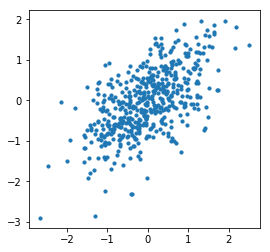

In [3]:
n = 500
d = 2

t = np.array([[1, 1], [1, -1]])
t = t/np.sqrt(np.square(t).sum(axis=1))

sigmas = [1.0, 0.5]
w = np.array([np.random.normal(0.0, s, (n,)) for s in sigmas]).T

x = np.dot(w, t)

plt.scatter(x[:, 0], x[:, 1], s=10, c=colors[0])
plt.gca().set_aspect('equal')
plt.show()

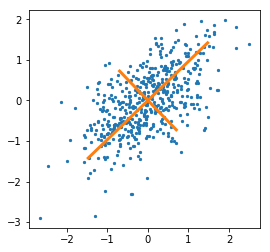

In [4]:
pca = PCA().fit(x)
pca.components_

plt.scatter(x[:, 0], x[:, 1], s=5, c=colors[0])

for (z, v) in zip(pca.components_, pca.explained_variance_):
    p = 2*np.sqrt(v)*z
    plt.plot([p[0], -p[0]], [p[1], -p[1]], '-', lw=3, c=colors[1])
    
plt.gca().set_aspect('equal')
plt.show()

$z = \log(c + 1)$

$e^z = c + 1$

$c = e^z - 1$

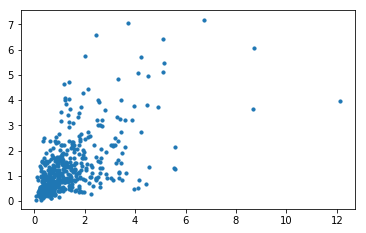

In [5]:
c = np.exp(x)
plt.scatter(c[:, 0], c[:, 1], s=10)
plt.gca().set_aspect('equal')
plt.show()

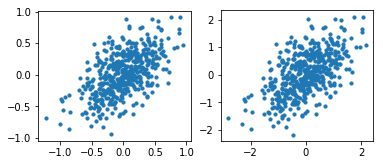

In [6]:
y = np.log10(c + 1)

plt.subplot(1, 2, 1)
plt.scatter(y[:, 0], y[:, 1], s=10)
plt.gca().set_aspect('equal')

plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], s=10, c=colors[0])
plt.gca().set_aspect('equal')
plt.show()

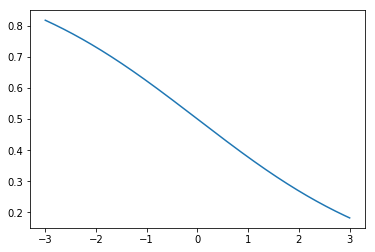

In [20]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

t = np.linspace(-3, 3, 1000)
plt.plot(t, 1-sigmoid((t+0.0)/2.0))

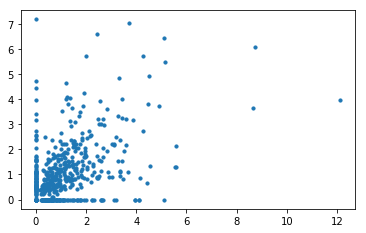

In [21]:
def p_drop(x):
    return 1 - sigmoid(x+1.5)

drop = p_drop(x) > np.random.rand(*x.shape)
drop.sum()/np.prod(drop.shape)

r = c.copy()
r[drop] = 0.0

plt.scatter(r[:, 0], r[:, 1], s=10)
plt.gca().set_aspect('equal')
plt.show()

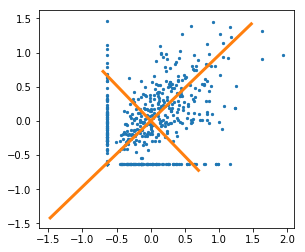

In [22]:
y = np.log(r + 1)
y = y - y.mean(axis=0)

pca = PCA().fit(x)
pca.components_

plt.scatter(y[:, 0], y[:, 1], s=5, c=colors[0])

for (z, v) in zip(pca.components_, pca.explained_variance_):
    p = 2*np.sqrt(v)*z
    plt.plot([p[0], -p[0]], [p[1], -p[1]], '-', lw=3, c=colors[1])
    
plt.gca().set_aspect('equal')
plt.show()